In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib


In [2]:
import os 
from datetime import date

In [3]:
today = date.today()
root_path = './Data/MachineLearningCVE/'
output_path = f'.\Data\Cypher-CICIDS2017-{today}.csv'

In [4]:
all_dataframes = []

In [5]:
if os.path.join(root_path):
    for csv_file in os.listdir(root_path):
        if csv_file.endswith('.csv'):
            csv_path = os.path.join(root_path+csv_file)
            df = pd.read_csv(csv_path)
            df['SourceFile'] = csv_file.strip().split('.csv')[0]
            all_dataframes.append(df)

else:
    print("cant join")

In [6]:
# Gộp tất cả DataFrame thành một
metadata_df = pd.concat(all_dataframes, ignore_index=True)
# Xóa khoảng cách trong tên cột
metadata_df.columns = metadata_df.columns.str.replace(' ', '')

In [7]:
metadata_df.rename(columns={'FlowBytes/s': 'FlowBytesPerSec',
                   'FlowPackets/s': 'FlowPacketsPerSec',
                   'FwdPackets/s': 'FwdPacketsPerSec',
                   'BwdPackets/s': 'BwdPacketsPerSec',
                   'Down/UpRatio': 'DownUpRatio',
                   'FwdAvgBytes/Bulk': 'FwdAvgBytesPerBulk',
                   'FwdAvgPackets/Bulk': 'FwdAvgPacketsPerBulk',
                   'BwdAvgBytes/Bulk': 'BwdAvgBytesPerBulk',
                   'BwdAvgPackets/Bulk': 'BwdAvgPacketsPerBulk',
                   'FwdHeaderLength.1': 'FwdHeaderLength_1'},
          inplace=True, errors='raise')


In [8]:
# Lưu DataFrame thành file CSV mới
metadata_df.to_csv(output_path,encoding='utf-8-sig', index=False)

In [9]:

# Đọc tệp CSV
data = pd.read_csv(f'.\Data\Cypher-CICIDS2017-{today}.csv')

# Xem thông tin cơ bản
print(data.head())  # Xem vài hàng đầu tiên
print(data.info())  # Thông tin về kiểu dữ liệu và giá trị thiếu
print(data.describe())  # Thống kê mô tả


   DestinationPort  FlowDuration  TotalFwdPackets  TotalBackwardPackets  \
0            54865             3                2                     0   
1            55054           109                1                     1   
2            55055            52                1                     1   
3            46236            34                1                     1   
4            54863             3                2                     0   

   TotalLengthofFwdPackets  TotalLengthofBwdPackets  FwdPacketLengthMax  \
0                       12                        0                   6   
1                        6                        6                   6   
2                        6                        6                   6   
3                        6                        6                   6   
4                       12                        0                   6   

   FwdPacketLengthMin  FwdPacketLengthMean  FwdPacketLengthStd  ...  \
0                   6      

c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


       DestinationPort  FlowDuration  TotalFwdPackets  TotalBackwardPackets  \
count     2.830743e+06  2.830743e+06     2.830743e+06          2.830743e+06   
mean      8.071483e+03  1.478566e+07     9.361160e+00          1.039377e+01   
std       1.828363e+04  3.365374e+07     7.496728e+02          9.973883e+02   
min       0.000000e+00 -1.300000e+01     1.000000e+00          0.000000e+00   
25%       5.300000e+01  1.550000e+02     2.000000e+00          1.000000e+00   
50%       8.000000e+01  3.131600e+04     2.000000e+00          2.000000e+00   
75%       4.430000e+02  3.204828e+06     5.000000e+00          4.000000e+00   
max       6.553500e+04  1.200000e+08     2.197590e+05          2.919220e+05   

       TotalLengthofFwdPackets  TotalLengthofBwdPackets  FwdPacketLengthMax  \
count             2.830743e+06             2.830743e+06        2.830743e+06   
mean              5.493024e+02             1.616264e+04        2.075999e+02   
std               9.993589e+03             2.263088

Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


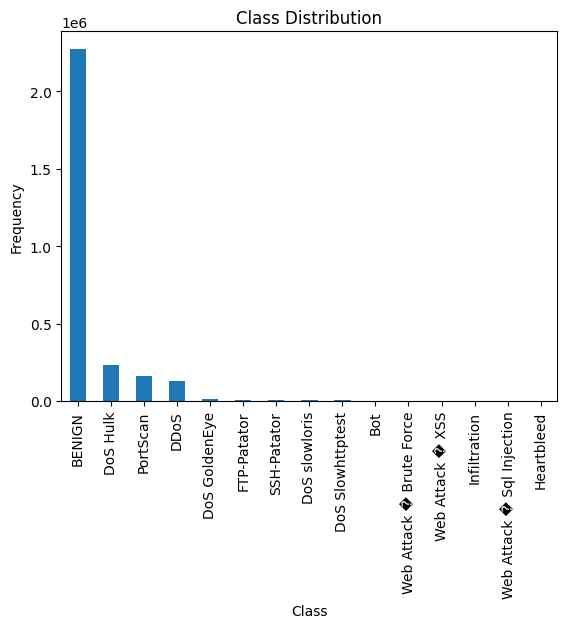

In [10]:
# Phân phối nhãn
print(data['Label'].value_counts())

# Biểu đồ phân phối nhãn
data['Label'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()


In [11]:
# Kiểm tra giá trị thiếu
print(data.isnull().sum())

# Loại bỏ hoặc thay thế
data.fillna(0, inplace=True)  # Thay thế giá trị thiếu bằng 0


DestinationPort            0
FlowDuration               0
TotalFwdPackets            0
TotalBackwardPackets       0
TotalLengthofFwdPackets    0
                          ..
IdleStd                    0
IdleMax                    0
IdleMin                    0
Label                      0
SourceFile                 0
Length: 80, dtype: int64


In [12]:
# # Loại bỏ cột không cần thiết
# columns_to_drop = ['FlowID', 'SourceIP', 'DestinationIP', 'Timestamp']
# data = data.drop(columns=columns_to_drop, errors='ignore')


In [13]:
# Tổng số mẫu BENIGN
benign_count = data[data['Label'] == 'BENIGN'].shape[0]

# Tổng số mẫu ATTACK (ngoài BENIGN)
attack_data = data[data['Label'] != 'BENIGN']
attack_data['Label'] = 'ATTACK'  # Gán nhãn mới cho ATTACK
attack_count = attack_data.shape[0]

C:\Users\Asus\AppData\Local\Temp\ipykernel_21180\2198183619.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attack_data['Label'] = 'ATTACK'  # Gán nhãn mới cho ATTACK


In [ ]:
attack_data

In [16]:
benign_count

2273097

In [14]:
# Lấy mẫu BENIGN cân bằng với ATTACK
benign_data = data[data['Label'] == 'BENIGN'].sample(n=attack_count, random_state=42)

# Gộp dữ liệu BENIGN và ATTACK lại
balanced_data = pd.concat([benign_data, attack_data], ignore_index=True)


In [15]:
# Lưu dữ liệu mới vào file CSV
output_file = f".\Data\Cypher-CICIDS2017-balanced-dataset-{today}.csv"
balanced_data.to_csv(output_file, index=False)

print(f"Balanced dataset saved to {output_file}")
print(f"BENIGN samples: {benign_data.shape[0]}, ATTACK samples: {attack_data.shape[0]}")

Balanced dataset saved to .\Data\Cypher-CICIDS2017-balanced-dataset-2024-12-16.csv
BENIGN samples: 557646, ATTACK samples: 557646
